In [151]:
import warnings
warnings.filterwarnings('ignore')

In [152]:
import pandas as pd

In [153]:
df = pd.read_csv('AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [154]:
df.drop(['PID','Order'], axis = 1, inplace = True ) #There is no need for PID and order

In [155]:
df.shape

(2930, 80)

In [156]:
columns_with_null_values = df.loc[:,(df.isnull().sum()>0).values].columns.tolist()

In [157]:
df[columns_with_null_values].isnull().sum()

,0
Lot Frontage,490
Alley,2732
Mas Vnr Type,1775
Mas Vnr Area,23
Bsmt Qual,80
Bsmt Cond,80
Bsmt Exposure,83
BsmtFin Type 1,80
BsmtFin SF 1,1
BsmtFin Type 2,81


In [158]:
#We drop the features with a lot of null-values
columns_with_null_values_high = df.loc[:,(df.isnull().sum()>150).values].columns.tolist()
columns_with_null_values_high

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

In [159]:
df.drop(columns_with_null_values_high, axis = 1, inplace = True)

In [160]:
col_drop = []
for col in columns_with_null_values:
  if col not in columns_with_null_values_high:
    col_drop.append(col)
columns_with_null_values = col_drop

In [161]:
df[columns_with_null_values].isnull().sum() #Remaining null values

,0
Mas Vnr Area,23
Bsmt Qual,80
Bsmt Cond,80
Bsmt Exposure,83
BsmtFin Type 1,80
BsmtFin SF 1,1
BsmtFin Type 2,81
BsmtFin SF 2,1
Bsmt Unf SF,1
Total Bsmt SF,1


In [162]:
for col in columns_with_null_values:
  if df[col].dtypes == ('int' or 'float'):
    df[col].fillna(df[col].mean(), inplace = True)
  else:
    df[col].fillna(df[col].value_counts().idxmax(), inplace = True)

In [163]:
#Check if any null values remain

print(f'Remaining null values: {df.isnull().sum().sum()}')

Remaining null values: 0


In [164]:
#We now choose how to encode the categorical features

categorical_cols = df.loc[:,df.dtypes == 'object'].columns.tolist()
categorical_cols

['MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Paved Drive',
 'Sale Type',
 'Sale Condition']

In [165]:
rem_cat_cols = categorical_cols[:]

In [166]:
#Ordinal categorical encoding
df['Utilities'].replace({"ELO": 0, "NoSeWa": 1, "NoSewr": 2, "AllPub": 3}, inplace = True)
df['Utilities'].value_counts()
rem_cat_cols.remove('Utilities')

In [167]:
#Almost all data has value 3, so this feature does not tell us much, and we drop it
df.drop('Utilities', axis = 1, inplace = True)

In [168]:
df['Land Slope'].value_counts()

,count
Land Slope,
Gtl,2789
Mod,125
Sev,16


In [169]:
df['Land Slope'].replace({'Gtl': 0, 'Mod':1, 'Sev':2}, inplace = True)
rem_cat_cols.remove('Land Slope')

In [170]:
print(df['Exter Qual'].value_counts(), df['Exter Cond'].value_counts())

Exter Qual
TA    1799
Gd     989
Ex     107
Fa      35
Name: count, dtype: int64 Exter Cond
TA    2549
Gd     299
Fa      67
Ex      12
Po       3
Name: count, dtype: int64


In [171]:
df['Exter Qual'].replace({'Po': 0, 'Fa': 1, 'TA':2, 'Gd': 3, 'Ex': 4}, inplace = True)
df['Exter Cond'].replace({'Po': 0, 'Fa': 1, 'TA':2, 'Gd': 3, 'Ex': 4}, inplace = True)
rem_cat_cols.remove('Exter Qual')
rem_cat_cols.remove('Exter Cond')

In [172]:
print(df['Bsmt Cond'].value_counts(), df['Bsmt Qual'].value_counts(), df['Bsmt Exposure'].value_counts())

Bsmt Cond
TA    2696
Gd     122
Fa     104
Po       5
Ex       3
Name: count, dtype: int64 Bsmt Qual
TA    1363
Gd    1219
Ex     258
Fa      88
Po       2
Name: count, dtype: int64 Bsmt Exposure
No    1989
Av     418
Gd     284
Mn     239
Name: count, dtype: int64


In [173]:
df['Bsmt Qual'].replace({'Po': 0, 'Fa': 1, 'TA':2, 'Gd': 3, 'Ex': 4}, inplace = True)
df['Bsmt Cond'].replace({'Po': 0, 'Fa': 1, 'TA':2, 'Gd': 3, 'Ex': 4}, inplace = True)
df['Bsmt Exposure'].replace({'NA': 0, 'No': 1, 'Mn':2, 'Av': 3, 'Gd': 4}, inplace = True)
rem_cat_cols.remove('Bsmt Qual')
rem_cat_cols.remove('Bsmt Cond')
rem_cat_cols.remove('Bsmt Exposure')

In [174]:
print(df['BsmtFin Type 1'].value_counts(), df['Heating'].value_counts(), df['BsmtFin Type 2'].value_counts())

BsmtFin Type 1
GLQ    939
Unf    851
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64 Heating
GasA     2885
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: count, dtype: int64 BsmtFin Type 2
Unf    2580
Rec     106
LwQ      89
BLQ      68
ALQ      53
GLQ      34
Name: count, dtype: int64


In [175]:
df['BsmtFin Type 1'].replace({'NA':0, 'Unf': 1, 'LwQ':2, 'Rec':3 , 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}, inplace = True)
df['BsmtFin Type 2'].replace({'NA':0, 'Unf': 1, 'LwQ':2, 'Rec':3 , 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}, inplace = True)
df.drop('Heating', axis =1 , inplace = True)
rem_cat_cols.remove('BsmtFin Type 1')
rem_cat_cols.remove('BsmtFin Type 2')
rem_cat_cols.remove('Heating')

In [176]:
print(df['Heating QC'].value_counts(), df['Kitchen Qual'].value_counts(), df['Functional'].value_counts(), df['Paved Drive'].value_counts())

Heating QC
Ex    1495
TA     864
Gd     476
Fa      92
Po       3
Name: count, dtype: int64 Kitchen Qual
TA    1494
Gd    1160
Ex     205
Fa      70
Po       1
Name: count, dtype: int64 Functional
Typ     2728
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Sal        2
Name: count, dtype: int64 Paved Drive
Y    2652
N     216
P      62
Name: count, dtype: int64


In [177]:
df['Heating QC'].replace({'Po': 0, 'Fa': 1, 'TA':2, 'Gd': 3, 'Ex': 4}, inplace = True)
df['Kitchen Qual'].replace({'Po': 0, 'Fa': 1, 'TA':2, 'Gd': 3, 'Ex': 4}, inplace = True)
df['Paved Drive'].replace({'N': 0, 'N': 1, 'Y':2}, inplace = True)
df.drop('Functional', axis =1 , inplace =True)
rem_cat_cols.remove('Heating QC')
rem_cat_cols.remove('Kitchen Qual')
rem_cat_cols.remove('Functional')
rem_cat_cols.remove('Paved Drive')

In [178]:
df.drop('MS SubClass', axis =1, inplace = True)

In [179]:
#We one-hot encode the remaining categorical columns
df_final = pd.get_dummies(df)
df_final=df_final.astype('float')

In [180]:
df_final.head()

,Lot Area,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,31770.0,0.0,6.0,5.0,1960.0,1960.0,112.0,2.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,11622.0,0.0,5.0,6.0,1961.0,1961.0,0.0,2.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,14267.0,0.0,6.0,6.0,1958.0,1958.0,108.0,2.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,11160.0,0.0,7.0,5.0,1968.0,1968.0,0.0,3.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,13830.0,0.0,5.0,5.0,1997.0,1998.0,0.0,2.0,2.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

In [182]:
high_corr_columns= df_final.corr()['SalePrice'][np.abs(df_final.corr()['SalePrice'])>0.2].index.tolist()
high_corr_columns

['Lot Area',
 'Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Exter Qual',
 'Bsmt Qual',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'Total Bsmt SF',
 'Heating QC',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Full Bath',
 'Half Bath',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'SalePrice',
 'MS Zoning_RL',
 'MS Zoning_RM',
 'Lot Shape_IR1',
 'Lot Shape_Reg',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_StoneBr',
 'House Style_2Story',
 'Roof Style_Gable',
 'Roof Style_Hip',
 'Exterior 1st_VinylSd',
 'Exterior 2nd_VinylSd',
 'Foundation_BrkTil',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Central Air_N',
 'Central Air_Y',
 'Electrical_SBrkr',
 'Paved Drive_1',
 'Paved Drive_2',
 'Sale Type_New',
 'Sale Type_WD ',
 'Sale Condition_Partial']

In [183]:
df_final=df_final[high_corr_columns]

In [184]:
for col in df_final.columns.tolist():
  # Calculate correlation within the df_final DataFrame
  corr, p = pearsonr(df_final[col], df_final['SalePrice'])
  print(f'Correlation of {col} is: {corr}, and p-value is {p}')

Correlation of Lot Area is: 0.26654922032842954, and p-value is 7.633842673044195e-49
Correlation of Overall Qual is: 0.7992617947690233, and p-value is 0.0
Correlation of Year Built is: 0.5584261057120455, and p-value is 6.293707782619393e-240
Correlation of Year Remod/Add is: 0.5329737540266951, and p-value is 9.550218404536884e-215
Correlation of Mas Vnr Area is: 0.5021959770445462, and p-value is 4.881359756114454e-187
Correlation of Exter Qual is: 0.6979699339863418, and p-value is 0.0
Correlation of Bsmt Qual is: 0.6792629106563136, and p-value is 0.0
Correlation of Bsmt Exposure is: 0.3997697024945338, and p-value is 7.084404363006783e-113
Correlation of BsmtFin Type 1 is: 0.27196521239948357, and p-value is 7.494293292278464e-51
Correlation of BsmtFin SF 1 is: 0.4331473123581195, and p-value is 2.6394309672690545e-134
Correlation of Total Bsmt SF is: 0.6325288490320324, and p-value is 0.0
Correlation of Heating QC is: 0.45032465412429434, and p-value is 2.601173833262517e-146
C

In [186]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

In [187]:
df_final.columns = df_final.columns.astype(str)

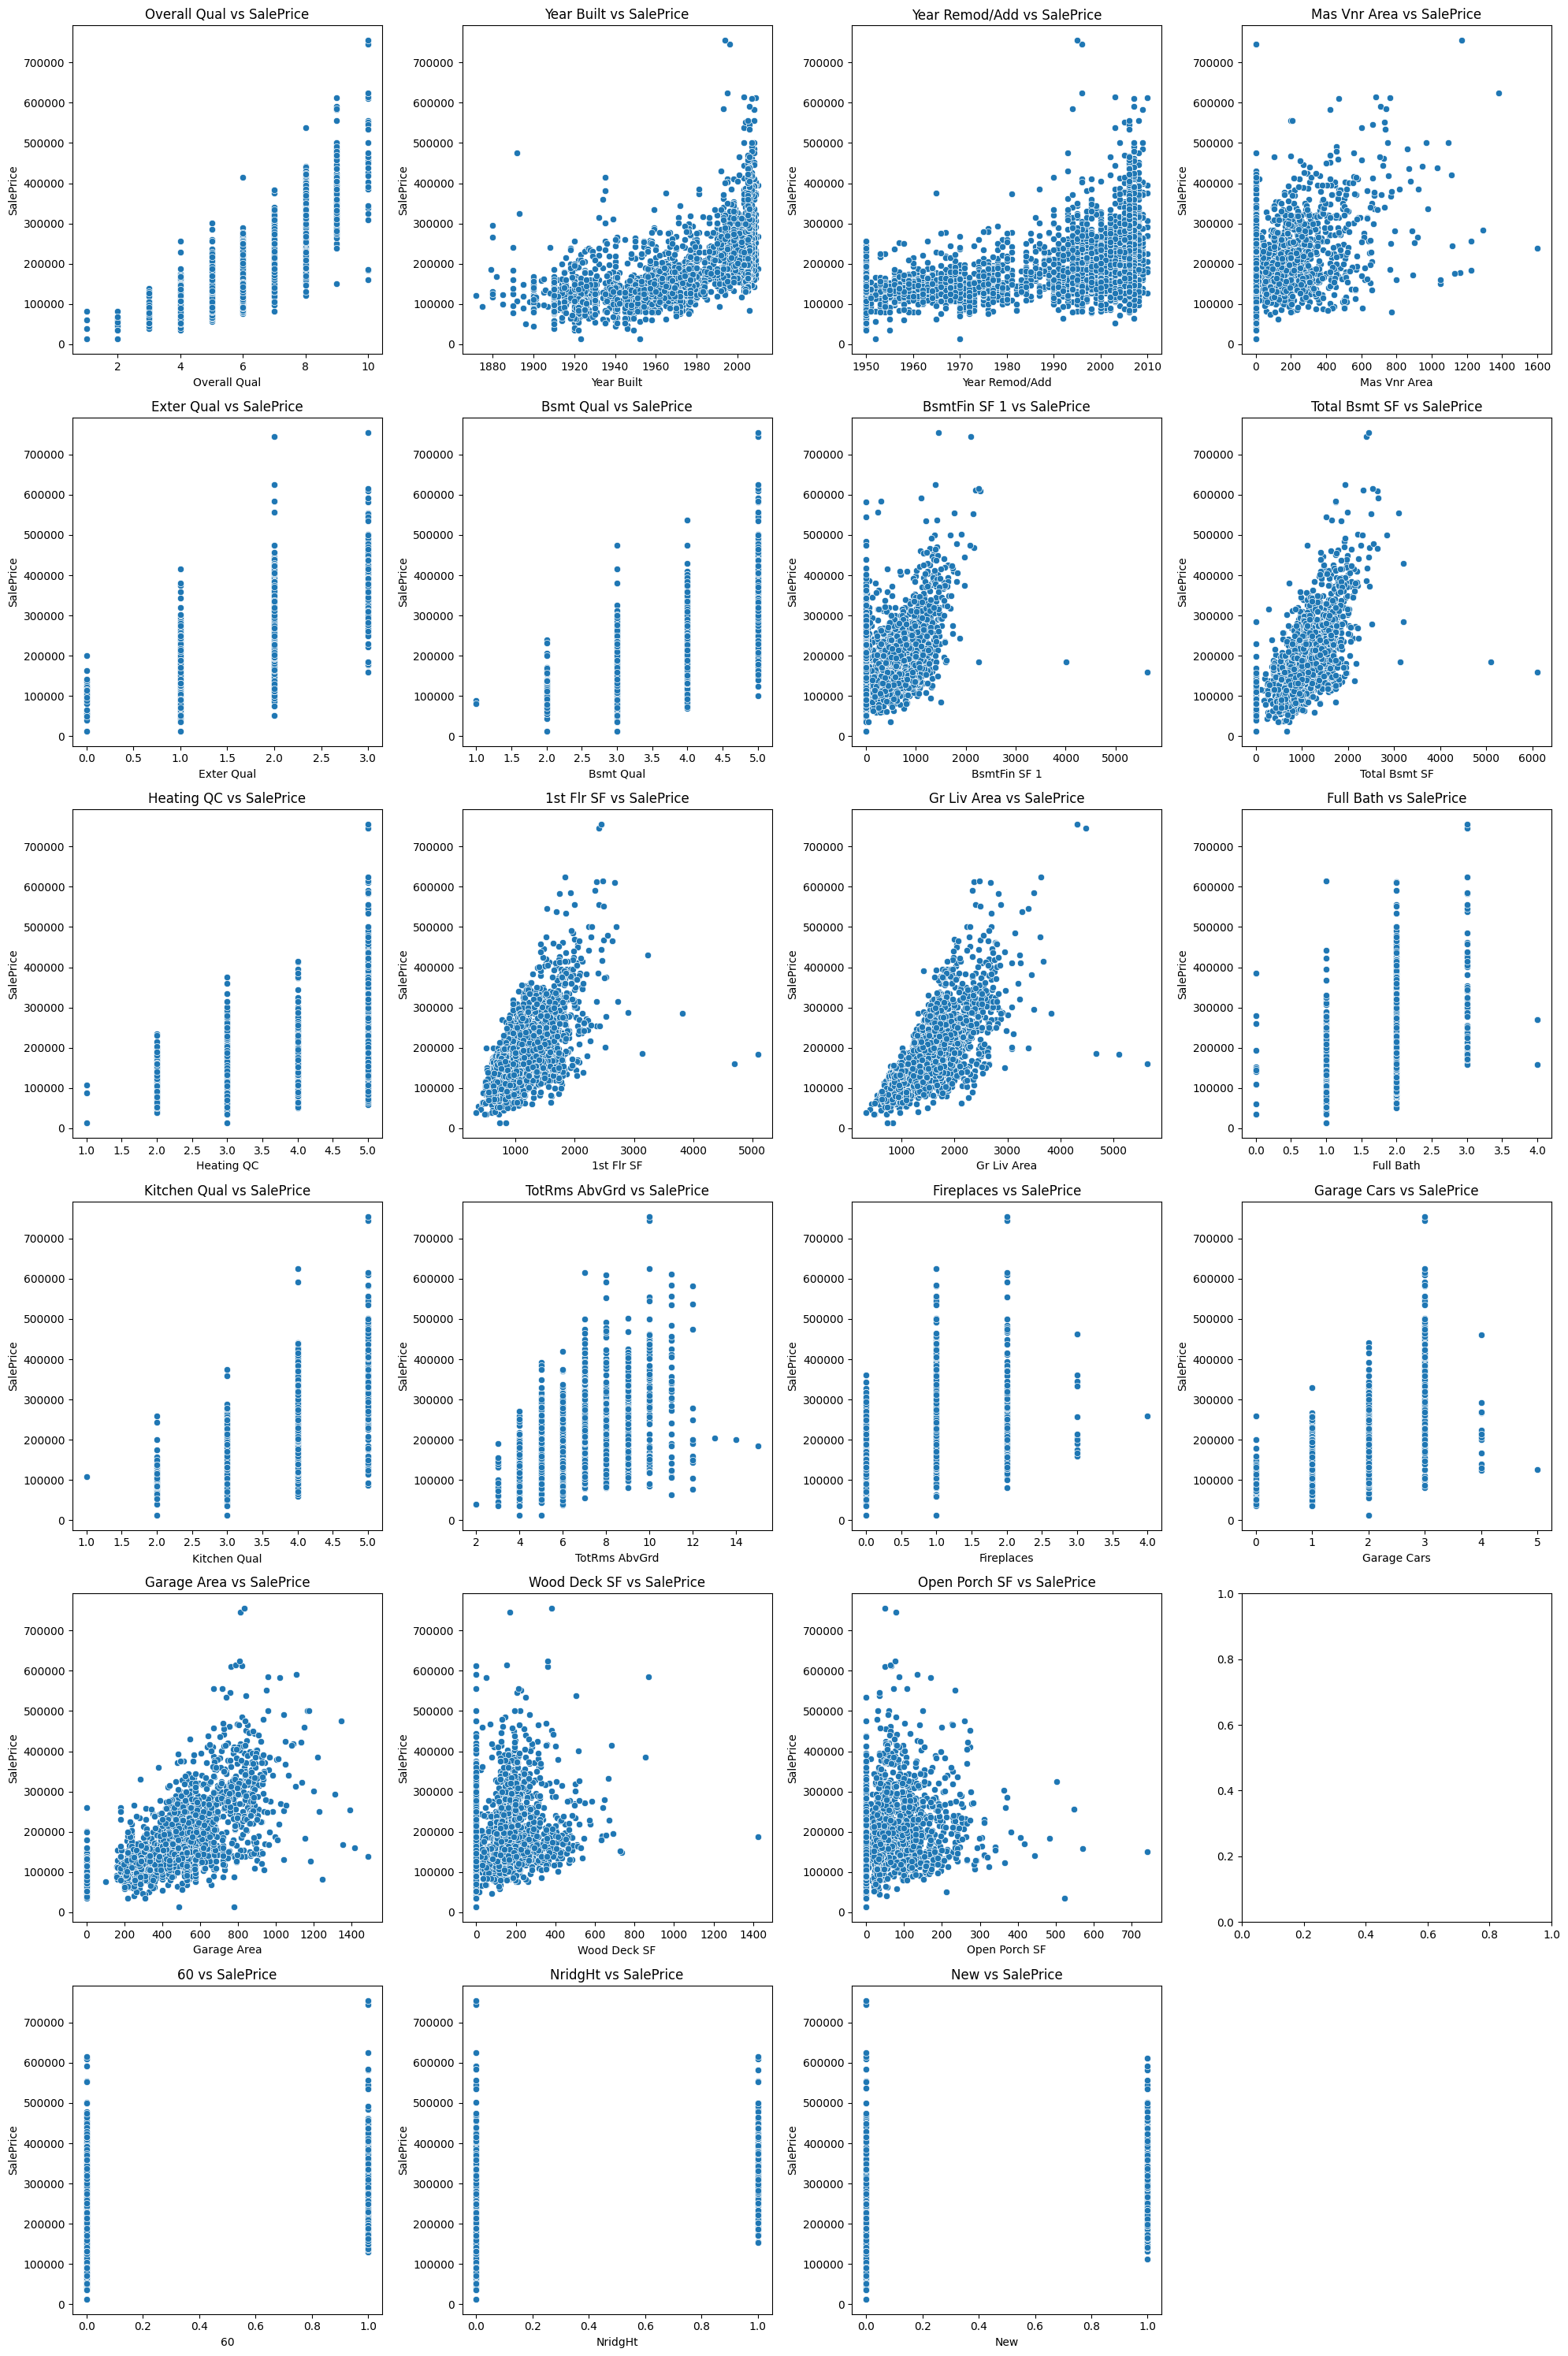

In [40]:
num_features = len(df_final.columns) - 1 # Exclude 'SalePrice'
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(df_final.columns):
    if col != 'SalePrice':
        sns.scatterplot(x=df_final[col], y=df_final['SalePrice'], ax=axes[i])
        axes[i].set_title(f'{col} vs SalePrice')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('SalePrice')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [188]:
X = df_final.copy()
X.drop(['SalePrice'], axis =1, inplace = True)
y = df_final['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#X_train.columns = X_train.columns.astype(str)
#X_test.columns = X_test.columns.astype(str)

ss= StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [189]:
X_train.shape

(2051, 49)

In [211]:
lr = LinearRegression()
lr.fit(X_train_s,y_train)
print(f"R score for training:{lr.score(X_train_s,y_train)} and for testing: {lr.score(X_test_s,y_test)}")
r2_lr=lr.score(X_test_s,y_test)

R score for training:0.8520842297812754 and for testing: 0.870851596232813


In [191]:
ridge = Ridge()
lasso = Lasso()
grid_lasso = GridSearchCV(lasso, param_grid = {'alpha' : [350,400,450]}, cv=5)

grid_lasso.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [350, 400, 450]})

In [192]:
grid_ridge = GridSearchCV(ridge, param_grid = {'alpha' : [350,400,450]}, cv=5)
grid_ridge.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [350, 400, 450]})

In [193]:
print(f'R2 score of Ridge: {grid_ridge.best_estimator_.score(X_test_s,y_test)} and of Lasso: {grid_lasso.best_estimator_.score(X_test_s,y_test)}')

R2 score of Ridge: 0.8739901004446213 and of Lasso: 0.8734787631605816


In [212]:
r2_ridge = grid_ridge.best_estimator_.score(X_test_s,y_test)
r2_lasso = grid_lasso.best_estimator_.score(X_test_s,y_test)

In [220]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import root_mean_squared_log_error as rmsle

In [221]:
print(f'RMSLE of LR: {rmsle(y_test, np.abs(lr.predict(X_test_s)))}, of Ridge: {rmsle(y_test, np.abs(grid_ridge.best_estimator_.predict(X_test_s)))}, of Lasso: {rmsle(y_test, np.abs(grid_lasso.best_estimator_.predict(X_test_s)))}' )

RMSLE of LR: 0.1509159542194322, of Ridge: 0.1421659282590936, of Lasso: 0.14534090675425046


In [227]:
RMSLE_lr = rmsle(y_test, np.abs(lr.predict(X_test_s)))
RMSLE_lasso = rmsle(y_test,np.abs(grid_lasso.best_estimator_.predict(X_test_s)))
RMSLE_ridge = rmsle(y_test,np.abs(grid_ridge.best_estimator_.predict(X_test_s)))

In [214]:
rf = RandomForestRegressor()
parameters = {"n_estimators": [40,60,80,100], "criterion": [ 'absolute_error', 'friedman_mse'],
              "max_depth": [50,100], "max_features": ['sqrt', 'log2']}
grid_rf = GridSearchCV(rf, param_grid=parameters, cv = 5)
grid_rf.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['absolute_error', 'friedman_mse'],
                         'max_depth': [50, 100],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [40, 60, 80, 100]})

In [222]:
print(f'RMSLE of RF:{rmsle(y_test, grid_rf.best_estimator_.predict(X_test_s))} and R^2 score: {grid_rf.best_estimator_.score(X_test_s,y_test)}')

RMSLE of RF:0.11434490475135148 and R^2 score: 0.9096915048396254


In [229]:
RMSLE_rf = rmsle(y_test, grid_rf.best_estimator_.predict(X_test_s))
r2_rf = grid_rf.best_estimator_.score(X_test_s,y_test)

In [196]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [197]:
X_train_s.shape

(2051, 49)

In [198]:
X_train_s_nn = X_train_s[:1500]
X_val_s_nn = X_train_s[1500:]
y_train_nn = y_train[:1500]
y_val_nn = y_train[1500:]

In [199]:
#Simple neural network for a regression problem using the Keras Sequential model
nn_model=Sequential()
nn_model.add(Dense(256, activation='relu'))
#nn_model.add(Dropout(0.5))
nn_model.add(Dense(256, activation= 'relu'))
#nn_model.add(Dropout(0.5))
nn_model.add(Dense(128, activation= 'relu'))
nn_model.add(Dense(1))

nn_model.compile(optimizer='rmsprop', loss=keras.losses.MeanSquaredLogarithmicError())

In [200]:
from tensorflow.keras.callbacks import ModelCheckpoint

callback = ModelCheckpoint('bestmodel.model.keras', monitor ='val_loss', save_best_only = True)

In [201]:
history=nn_model.fit(X_train_s_nn,y_train_nn,batch_size=32, epochs=120, validation_data=(X_val_s_nn,y_val_nn),
                     callbacks = callback)

Epoch 1/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 85.2203 - val_loss: 37.7192
Epoch 2/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 32.0481 - val_loss: 18.4867
Epoch 3/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.5749 - val_loss: 9.0479
Epoch 4/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.6442 - val_loss: 4.2227
Epoch 5/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5287 - val_loss: 1.8077
Epoch 6/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4892 - val_loss: 0.7155
Epoch 7/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5501 - val_loss: 0.2974
Epoch 8/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2444 - val_loss: 0.1652
Epoch 9/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1433 - val_loss: 0.1194
Epoch 10/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1177 - val_loss: 0.0973
Epoch 11/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0921 - val_loss: 0.0828
Epoch 12/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss

In [202]:
best_model=keras.models.load_model('bestmodel.model.keras')

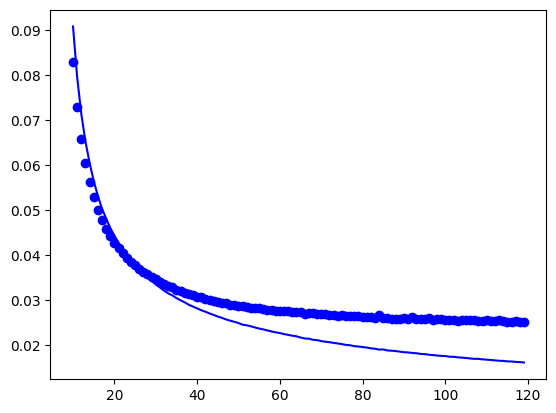

In [203]:
import matplotlib.pyplot as plt
#Plot comparing the validation loss and the loss on the training set during the last 100 epochs
epochs = len(history.history['loss'])
plt.plot(range(10,epochs),history.history['loss'][10:],'b')
plt.plot(range(10,epochs),history.history['val_loss'][10:],'bo')

In [218]:
print(np.sqrt(best_model.evaluate(X_test_s,y_test)))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160 
0.12818011313878266


In [205]:
from sklearn.metrics import r2_score
r2_score(y_test, best_model.predict(X_test_s))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


0.8880204790790798

In [223]:
rmsle(y_test, best_model.predict(X_test_s))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.12818018080083968

In [231]:
r2_nn=r2_score(y_test, best_model.predict(X_test_s))
RMSLE_nn = rmsle(y_test, best_model.predict(X_test_s))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [253]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb_params = {'loss': ['squared_error', 'absolute_error'], 'learning_rate':[0.01,0.1,1], 'n_estimators': [80,100,120]}
grid_gb = GridSearchCV(gb, param_grid = gb_params, cv=5 )
grid_gb.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'loss': ['squared_error', 'absolute_error'],
                         'n_estimators': [80, 100, 120]})

In [254]:
RMSLE_gb = rmsle(y_test,grid_gb.best_estimator_.predict(X_test_s))
r2_gb = r2_score(y_test, grid_gb.best_estimator_.predict(X_test_s))

In [256]:
results = pd.DataFrame({
    'lr': [RMSLE_lr, r2_lr],
    'Ridge': [RMSLE_ridge, r2_ridge],
    'Lasso': [RMSLE_lasso, r2_lasso],
    'R_forrest': [RMSLE_rf, r2_rf],
    'G-boost': [RMSLE_gb, r2_gb],
    'NN': [RMSLE_nn, r2_nn]
}, index=['RMSLE', 'R^2-score'])

display(results)

,lr,Ridge,Lasso,R_forrest,G-boost,NN
RMSLE,0.150916,0.142166,0.145341,0.114345,0.117478,0.12818
R^2-score,0.870852,0.873990,0.873479,0.909692,0.906847,0.88802


Text(0, 0.5, 'Predicted values')

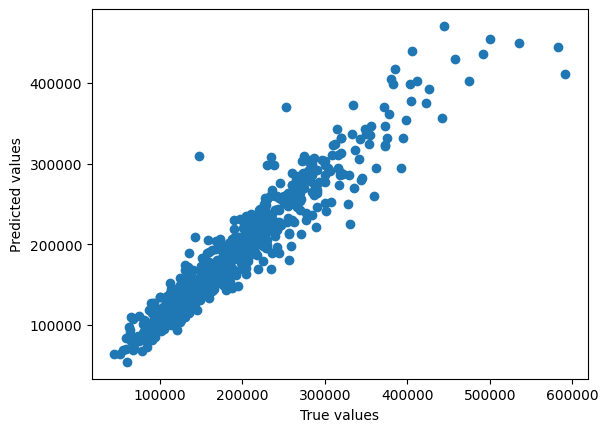

In [257]:
plt.scatter(x= y_test, y =grid_rf.best_estimator_.predict(X_test_s) )
plt.xlabel('True values')
plt.ylabel('Predicted values')